## Task 5
### Impact of rounding errors on linear systems solving. Conditional numbers

In [190]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from scipy.linalg import hilbert
import scipy.stats as stats
import scipy.sparse as sparse

In [191]:
def get_spectral_condition_number(matrix: np.ndarray) -> float:
    return linalg.norm(matrix) * linalg.norm(linalg.inv(matrix))

def get_volume_condition_number(matrix: np.ndarray) -> float:
    volume = 1
    for row in matrix:
        volume *= linalg.norm(row)
    return volume / abs(linalg.det(matrix))

def get_angle_condition_number(matrix: np.ndarray) -> float:
    inverse_matrix = linalg.inv(matrix)
    
    candidates = []
    for row, column in zip(matrix, inverse_matrix.T):
        candidates.append(linalg.norm(row) * linalg.norm(column))

    return max(candidates)

In [192]:
def run_test(matrix: np.ndarray, right_part: np.ndarray, true_solution: np.ndarray):
    spectral_condition_number = get_spectral_condition_number(matrix)
    volume_condition_number = get_volume_condition_number(matrix)
    angle_condition_number = get_angle_condition_number(matrix)

    print("Spectral condition number: ", spectral_condition_number)
    print("Volume condition number: ", volume_condition_number)
    print("Angle condition number: ", angle_condition_number)

    rounding_errors = []
    solution_errors = []

    for error_degree in range(-10, -2):
        rounding_error = 10 ** error_degree
        perturbed_matrix = matrix - rounding_error
        perturbed_right_part = right_part - rounding_error
        solution_with_error = linalg.solve(perturbed_matrix, perturbed_right_part)
        solution_error = linalg.norm(true_solution - solution_with_error)

        rounding_errors.append(rounding_error)
        solution_errors.append(solution_error)
    
    plt.figure(figsize=(6, 3))
    plt.plot(rounding_errors, solution_errors, label='Impact of rounding error on solution error', color='red')
    plt.xscale('log')
    plt.xlabel('rounding error')
    plt.ylabel('solution error')
    plt.grid()
    plt.show()

### Diagonal matrix
### Spectral consition number is not good

[[1.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+10 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e+00]]
Spectral condition number:  30000000000.0
Volume condition number:  0.9999999999999997
Angle condition number:  1.0


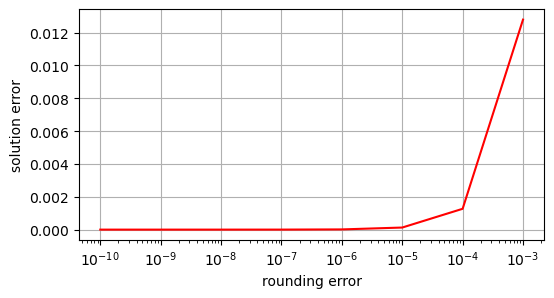

In [193]:
n = 10
matrix = np.eye(n)
matrix[1][1] = 10 ** n
print(matrix)
x = np.random.rand(n)
b = np.dot(matrix, x)
run_test(matrix, b, x)

### Tridiagonal matrix
#### Volume condition number is not good

[[ 1.  3.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-2.  1.  3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -2.  1.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -2.  1.  3.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -2.  1.  3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -2.  1.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -2.  1.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -2.  1.  3.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -2.  1.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -2.  1.]]
Spectral condition number:  22.059643110907228
Volume condition number:  7.579512292771126
Angle condition number:  3.024110721460789


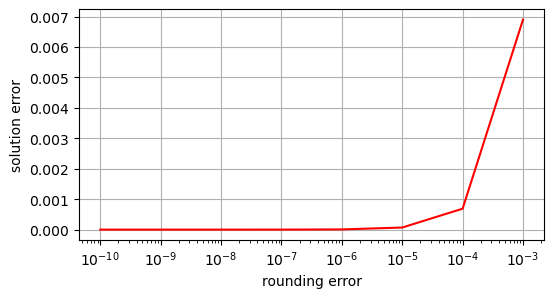

In [194]:
n = 10
matrix = 1 * np.identity(n) + -2 * np.eye(n, k=-1) + 3 * np.eye(n, k=1)
print(matrix)
x = np.random.rand(n)
b = np.dot(matrix, x)
run_test(matrix, b, x)

### Diagonally dominant matrix
#### Volume condition number is not good

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]
Spectral condition number:  98.12237257628864
Volume condition number:  589.090909090909
Angle condition number:  12.89820283464469


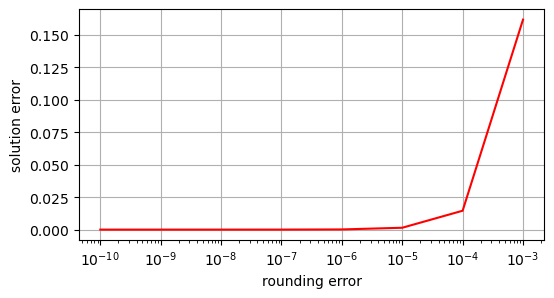

In [195]:
n = 10
matrix = np.eye(n) * 2 + np.eye(n, k=-1) * -1 + np.eye(n, k=1) * -1
print(matrix)
x = np.random.rand(n)
b = np.dot(matrix, x)
run_test(matrix, b, x)

### Hilbert matrix

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125     ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1       ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667]]
Spectral condition number:  15493617168.394407
Volume condition number:  7.564447622076398e+29
Angle condition number:  2025215053.2934334


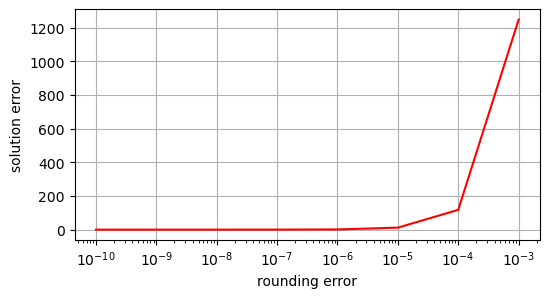

In [196]:
n = 8
matrix = hilbert(n)
print(matrix)
x = np.random.rand(n)
b = np.dot(matrix, x)
run_test(matrix, b, x)

### Well conditioned matrix


Spectral condition number:  9.601740232838806
Volume condition number:  6.2504383259923495
Angle condition number:  2.389720935590592


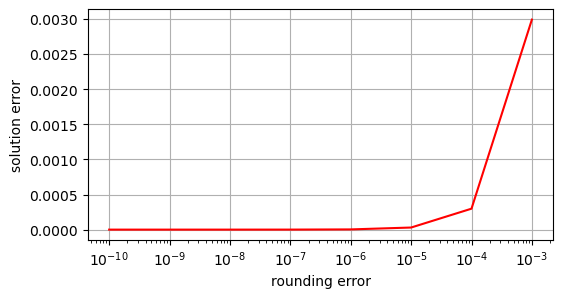

In [197]:
n = 5
matrix = np.random.rand(n, n)
while get_angle_condition_number(matrix) >= 10 or get_spectral_condition_number(matrix) >= 10 or get_volume_condition_number(matrix) >= 10:
    matrix = np.random.rand(n, n)
x = np.random.rand(n)
b = np.dot(matrix, x)
run_test(matrix, b, x)

### 